In [1]:
# Imporações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Analise e Tratamento**

## **Analisando os Dados**

In [2]:
# Visualiando dados
atletas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olimpiadas/120 years of Olympic history/athlete_events.csv')
atletas.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Visualisando informações do tipo de cada coluna
atletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
# Visualisando quantidade de valores nulos
atletas.isnull().sum().sort_values(ascending=False).head(5)

,0
Medal,231333
Weight,62875
Height,60171
Age,9474
ID,0


In [5]:
# Quantidade de linhas e colunas
atletas.shape

(271116, 15)

## **Substituindo os valores nulos**

In [6]:
# Selecionando a coluna medalha e substituindo os valores vazios
atletas.loc[atletas.Medal.isnull(),'Medal'] = 'Sem Medalha'

In [7]:
# Verificando a média dos peso
atletas.Weight.mean()

70.70239290053351

In [8]:
# Verificando a média das altura
atletas.Height.mean()

175.33896987366376

In [9]:
# Verificando a média das idades
atletas.Age.mean()

25.556898357297374

In [10]:
# Selecionando as colunas com altura, peso e idade vazias e substituindo pelas médias
atletas.loc[atletas.Weight.isnull(),'Weight'] = atletas.Weight.mean().round()
atletas.loc[atletas.Height.isnull(),'Height'] = atletas.Height.mean().round()
atletas.loc[atletas.Age.isnull(),'Age'] = atletas.Age.mean().round()

In [11]:
# Conferindo
atletas.isnull().sum().sort_values(ascending=False).head(5)

,0
ID,0
Name,0
Sex,0
Age,0
Height,0


# **Informações gerais dos paises**

## **Medalhas**

In [12]:
# Paises com mais medalhas ao longo da historia
atletas.loc[atletas.Medal != 'Sem Medalha'].Team.value_counts().head(10)

,count
Team,
United States,5219
Soviet Union,2451
Germany,1984
Great Britain,1673
France,1550
Italy,1527
Sweden,1434
Australia,1306
Canada,1243


In [13]:
# Paises com a maior quanidade de ouro
atletas_ouro = atletas.loc[atletas.Medal == 'Gold']
atletas_ouro.Team.value_counts().head(10)

,count
Team,
United States,2474
Soviet Union,1058
Germany,679
Italy,535
Great Britain,519
France,455
Sweden,451
Hungary,432
Canada,422


In [14]:
# Paises com a maior quanidade de prata
atletas_prata = atletas.loc[atletas.Medal == 'Silver']
atletas_prata.Team.value_counts().head(10)

,count
Team,
United States,1512
Soviet Union,716
Germany,627
Great Britain,582
France,518
Italy,508
Sweden,476
Australia,453
Canada,413


In [15]:
# Paises com a maior quanidade de bronze
atletas_bronze = atletas.loc[atletas.Medal == 'Bronze']
atletas_bronze.Team.value_counts().head(10)

,count
Team,
United States,1233
Germany,678
Soviet Union,677
France,577
Great Britain,572
Australia,511
Sweden,507
Italy,484
Finland,415


<ipython-input-16-9e87eec07287>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


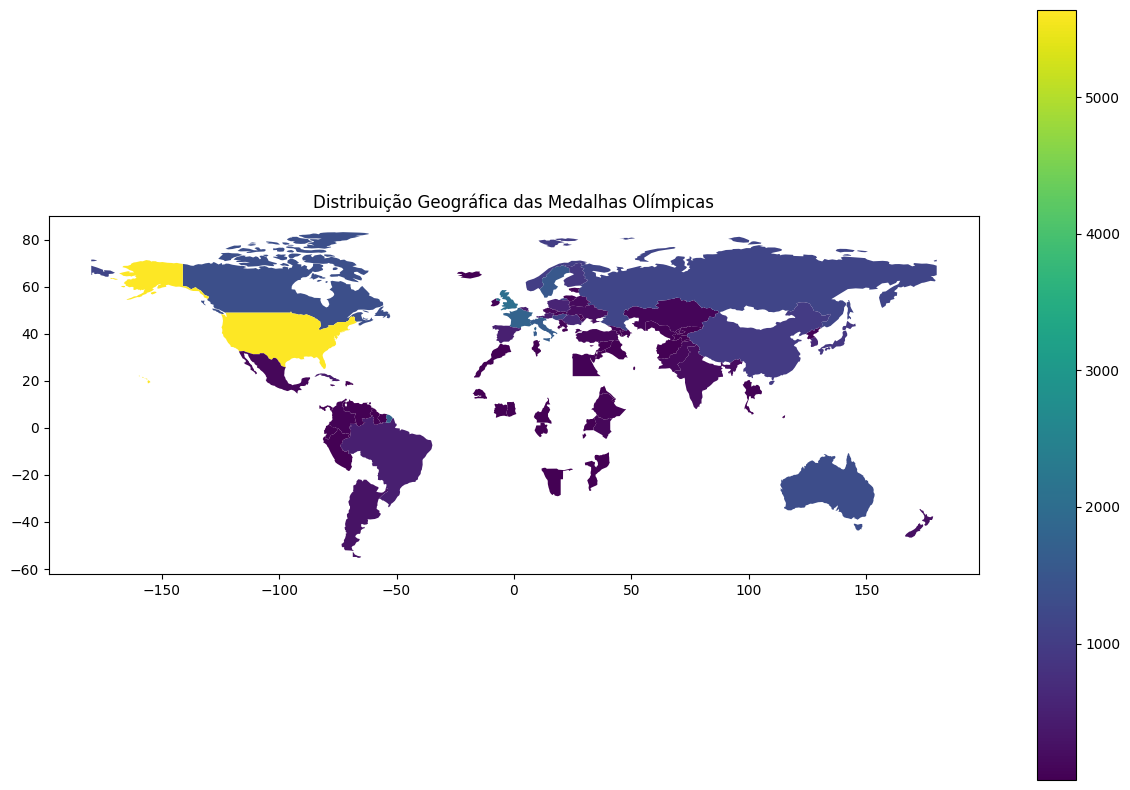

In [16]:
# Importar a biblioteca geopandas
!pip install geopandas
import geopandas as gpd

# Carregar o mapa mundial
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Agrupar os dados por país e contar as medalhas
medalhas_por_pais = atletas.loc[atletas.Medal != 'Sem Medalha'].groupby('NOC')['Medal'].count().reset_index()

# Mesclar os dados de medalhas com o mapa mundial
merged = world.merge(medalhas_por_pais, left_on='iso_a3', right_on='NOC', how='left')

# Criar o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Medal', cmap='viridis', legend=True, ax=ax)
ax.set_title('Distribuição Geográfica das Medalhas Olímpicas')
plt.show()


## **Esportes**

In [17]:
# Contar a quantidade de vezes que cada esporte aparece
esportes_populares = atletas['Sport'].value_counts().head(10)

# Imprimir os esportes mais populares
print(esportes_populares)

Sport
Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: count, dtype: int64


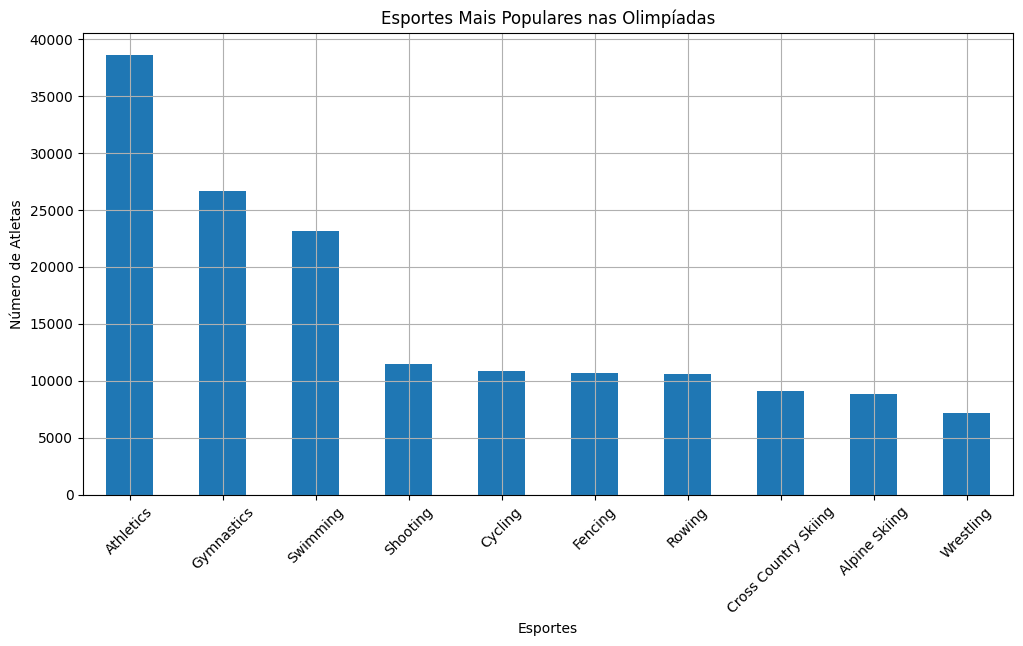

In [18]:
# Criar um gráfico de barras para visualizar os esportes mais populares
plt.figure(figsize=(12, 6))
esportes_populares.plot(kind='bar')
plt.xlabel('Esportes')
plt.ylabel('Número de Atletas')
plt.title('Esportes Mais Populares nas Olimpíadas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **Separando Temporadas Verão/Inverno**

In [19]:
atletas_verao = atletas.loc[atletas.Season == 'Summer']
atletas_verao.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Sem Medalha
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Sem Medalha
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Sem Medalha
3,4,Edgar Lindenau Aabye,M,34.0,175.0,71.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,71.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Sem Medalha


In [20]:
atletas_inverno = atletas.loc[atletas.Season == 'Winter']
atletas_inverno.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Sem Medalha
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",Sem Medalha
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,Sem Medalha
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",Sem Medalha
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,Sem Medalha


**Olimpiadas de Verão**

In [21]:
# Paises com mais medalhas nos jogos de verão

# Filtrando o DataFrame para incluir apenas as linhas com medalhas e jogos de verão
atletas_verao_com_medalhas = atletas_verao[atletas_verao.Medal != 'Sem Medalha']

# Contando as medalhas por país
atletas_verao_com_medalhas.Team.value_counts().head(10)

,count
Team,
United States,4686
Soviet Union,2061
Germany,1687
Great Britain,1598
France,1408
Italy,1384
Australia,1290
Hungary,1123
Sweden,1006


**Olimpiadas de Inverno**

In [22]:
# Paises com mais medalha nos jogos de inverno

# Filtrando o DataFrame para incluir apenas as linhas com medalhas e jogos de inverno
atletas_inverno_com_medalhas = atletas_inverno[atletas_inverno.Medal != 'Sem Medalha']

# Contando as medalhas por país
atletas_inverno_com_medalhas.Team.value_counts().head(10)

,count
Team,
Canada,575
United States,533
Norway,443
Sweden,428
Finland,426
Soviet Union,390
Germany,297
Austria,244
Russia,216


# **Brasil nas Olimpiadas**

In [23]:
# Total de medalhas do Brasil nas Olimpiadas de Verão
total_medalhas_brasil_verao = atletas_verao[(atletas_verao.Team == 'Brazil') & (atletas_verao.Medal != 'Sem Medalha')].Medal.count()
print(f'Total de {total_medalhas_brasil_verao}')

Total de 449


In [24]:
# Total de medalhas do Brasil nas Olimpiadas de Inverso
total_medalhas_brasil_inverso = atletas_inverno[(atletas_inverno.Team == 'Brazil') & (atletas_inverno.Medal != 'Sem Medalha')].Medal.count()
print(f'Total de {total_medalhas_brasil_inverso}')

Total de 0


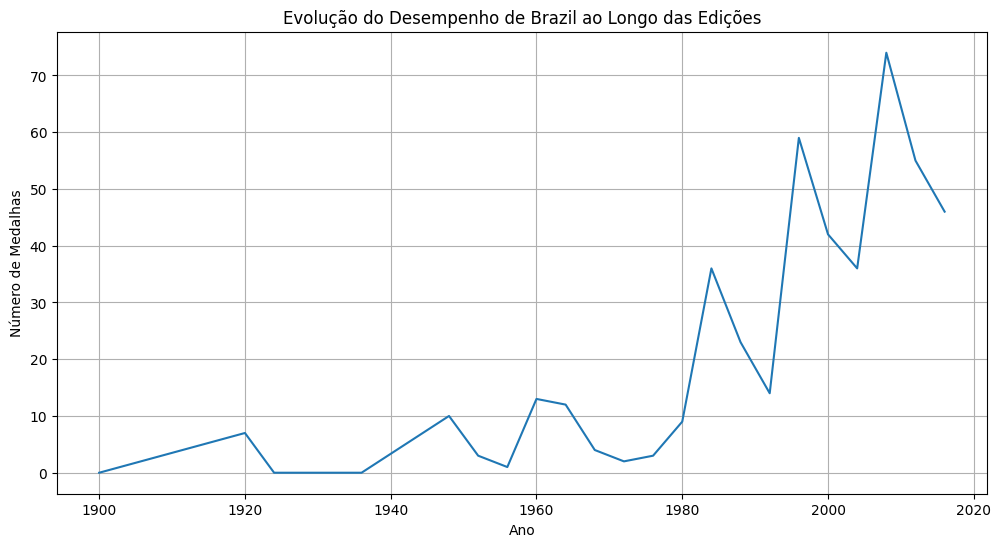

In [27]:
# Selecione o país desejado(em inglês)
pais = 'Brazil'

# Filtre o DataFrame para incluir apenas o país selecionado
atletas_pais = atletas_verao[(atletas_verao.Team == pais)]

# Agrupe os dados por ano e conte o número de medalhas
medalhas_por_ano = atletas_pais.groupby('Year')['Medal'].apply(lambda x: (x != 'Sem Medalha').sum()).reset_index()

# Crie um gráfico de linha para visualizar a evolução do desempenho
plt.figure(figsize=(12, 6))
plt.plot(medalhas_por_ano['Year'], medalhas_por_ano['Medal'])
plt.xlabel('Ano')
plt.ylabel('Número de Medalhas')
plt.title(f'Evolução do Desempenho de {pais} ao Longo das Edições')
plt.grid(True)
plt.show()


In [26]:
# Função para filtrar os dados
def filtrar_dados(df, team=None, Sport=None, Year=None):
  """
  Filtra os dados do DataFrame com base nos critérios fornecidos.

  Args:
    df: DataFrame a ser filtrado.
    team: País para filtrar (opcional).
    Sport: Sport para filtrar (opcional).
    Year: Edição (ano) para filtrar (opcional).

  Returns:
    DataFrame filtrado.
  """
  if team:
    df = df[df['Team'] == team]
  if Sport:
    df = df[df['Sport'] == Sport]
  if Year:
    df = df[df['Year'] == Year]
  return df

# Criar um widget para selecionar o país
team = "Brazil" #@param {type:"string"}

# Criar um widget para selecionar o Sport
Sport = "Athletics" #@param {type:"string"}

# Criar um widget para selecionar a edição
Year = 2016 # @param {"type":"number"}

# Filtrar os dados com base nos widgets
df_filtrado = filtrar_dados(atletas, team=team, Sport=Sport, Year=Year)

# Exibir os dados filtrados
df_filtrado.head(20)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
5714,3221,Higor Silva Alves,M,22.0,183.0,64.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Long Jump,Sem Medalha
7275,4070,Thiago do Rosario Andr,M,20.0,163.0,52.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",Sem Medalha
8862,4866,Luiz Alberto Cardoso de Arajo,M,29.0,188.0,88.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Decathlon,Sem Medalha
8934,4903,Geisa Rafaela Arcanjo,F,24.0,180.0,92.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Sem Medalha
12468,6778,Jos Alessandro Bernardo Baggio,M,35.0,172.0,63.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,Sem Medalha
13313,7226,Hugo Balduino de Sousa,M,29.0,187.0,74.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,Sem Medalha
25192,13182,Caio Oliveira de Sena Bonfim,M,25.0,174.0,60.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,Sem Medalha
25193,13182,Caio Oliveira de Sena Bonfim,M,25.0,174.0,60.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 50 kilometres Walk,Sem Medalha
28565,14810,Thiago Braz da Silva,M,22.0,183.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Pole Vault,Gold
32399,16651,Pedro Luiz Burmann de Oliveira,M,24.0,180.0,83.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,Sem Medalha
